<a href="https://colab.research.google.com/github/dominikadabrowska33/Obesity-or-CVD-risk-Classify-Regressor-Cluster-/blob/main/Multi_Class_Prediction_models_of_Obesity_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Obesity or CVD risk (Classify/Regressor/Cluster)**

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records. The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS) variables obtained : Gender, Age, Height and Weight.

NObesity values are:

•Underweight Less than 18.5 •Normal 18.5 to 24.9 •Overweight 25.0 to 29.9 •Obesity I 30.0 to 34.9 •Obesity II 35.0 to 39.9 •Obesity III Higher than 40



In [12]:
## REQUIRED LIBRARIES
# For data wrangling
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Read the data frame
from google.colab import drive
!git clone https://github.com/dominikadabrowska33/Obesity-or-CVD-risk-Classify-Regressor-Cluster-

fatal: destination path 'Obesity-or-CVD-risk-Classify-Regressor-Cluster-' already exists and is not an empty directory.


In [14]:
obesity = pd.read_csv(f'Obesity-or-CVD-risk-Classify-Regressor-Cluster-/ObesityDataSet.csv')
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [15]:
obesity['class'] = obesity['NObeyesdad'].astype('category').cat.codes #Encoding categories of class column into numerical values
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,class
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,5
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,6


In [16]:
# Creation of class map
obesity_class_map = obesity[['NObeyesdad', 'class']]
obesity_class_map = obesity_class_map.drop_duplicates()

obesity_class_map

,NObeyesdad,class
0,Normal_Weight,1
3,Overweight_Level_I,5
4,Overweight_Level_II,6
10,Obesity_Type_I,2
59,Insufficient_Weight,0
68,Obesity_Type_II,3
202,Obesity_Type_III,4


In [17]:
obesity_classes = obesity.pop('NObeyesdad') #removal of 'NObeyesdad' column
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,class
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,5
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,6


In [18]:
# Get unique count for each variable
obesity.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
class                                7
dtype: int64

In [19]:
# Check variable data types
obesity.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
class                                int8
dtype: object

I don't want to drop any columns since the unique count is less than the total count of rows. However, I aim to reduce the number of unique values and introduce intervals.



In [20]:
obesity['Age_bins'] = pd.cut(x=obesity['Age'], bins=[10, 20, 30, 40, 50, 60, 70, np.inf])
obesity['Height_bins'] = pd.cut(x=obesity['Height'], bins=[1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, np.inf])
obesity['Weight_bins'] = pd.cut(x=obesity['Weight'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 190, np.inf])
obesity['FCVC_bins'] = pd.cut(x=obesity['FCVC'], bins=8)
obesity['NCP_bins'] = pd.cut(x=obesity['NCP'], bins=8)
obesity['CH20_bins'] = pd.cut(x=obesity['CH2O'], bins=8)
obesity['FAF_bins'] = pd.cut(x=obesity['FAF'], bins=8)
obesity['TUE_bins'] = pd.cut(x=obesity['TUE'], bins=8)

obesity.dtypes

Gender                              object
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight      object
FAVC                                object
FCVC                               float64
NCP                                float64
CAEC                                object
SMOKE                               object
CH2O                               float64
SCC                                 object
FAF                                float64
TUE                                float64
CALC                                object
MTRANS                              object
class                                 int8
Age_bins                          category
Height_bins                       category
Weight_bins                       category
FCVC_bins                         category
NCP_bins                          category
CH20_bins                         category
FAF_bins   

In [21]:
# Convert text values into numerical values
from sklearn.preprocessing import LabelEncoder

object_columns = obesity.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
for col in  object_columns:
  obesity[col] = le.fit_transform(obesity[col])

obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS,class,Age_bins,Height_bins,Weight_bins,FCVC_bins,NCP_bins,CH20_bins,FAF_bins,TUE_bins
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,...,3,1,1,2,3,3,5,3,0,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,...,3,1,1,1,2,7,5,7,7,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,...,3,1,1,3,4,3,5,3,5,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,...,4,5,1,3,5,7,5,3,5,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,...,3,6,1,3,5,3,0,3,0,0


In [22]:
#drop columns converted to intervals
obesity = obesity.drop(columns=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'])
obesity.describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,class,Age_bins,Height_bins,Weight_bins,FCVC_bins,NCP_bins,CH20_bins,FAF_bins,TUE_bins
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,0.817622,0.883941,1.859308,0.020843,0.045476,2.268593,2.365230,3.015632,0.923733,2.503079,5.121270,4.885836,4.123638,3.446708,2.289910,2.170062
std,0.500083,0.386247,0.320371,0.468543,0.142893,0.208395,0.515498,1.261423,1.952090,0.740411,0.967170,2.685308,2.056257,1.981279,2.304925,2.132637,2.198443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,3.000000,1.000000,0.000000,2.000000,3.000000,3.000000,4.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,3.000000,3.000000,1.000000,3.000000,5.000000,5.000000,5.000000,3.000000,2.000000,2.000000
75%,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.000000,5.000000,1.000000,3.000000,7.000000,7.000000,5.000000,5.000000,4.000000,3.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000,4.000000,6.000000,5.000000,5.000000,14.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [23]:
# Check columns list and missing values
obesity.isnull().sum()

Gender                            0
family_history_with_overweight    0
FAVC                              0
CAEC                              0
SMOKE                             0
SCC                               0
CALC                              0
MTRANS                            0
class                             0
Age_bins                          0
Height_bins                       0
Weight_bins                       0
FCVC_bins                         0
NCP_bins                          0
CH20_bins                         0
FAF_bins                          0
TUE_bins                          0
dtype: int64

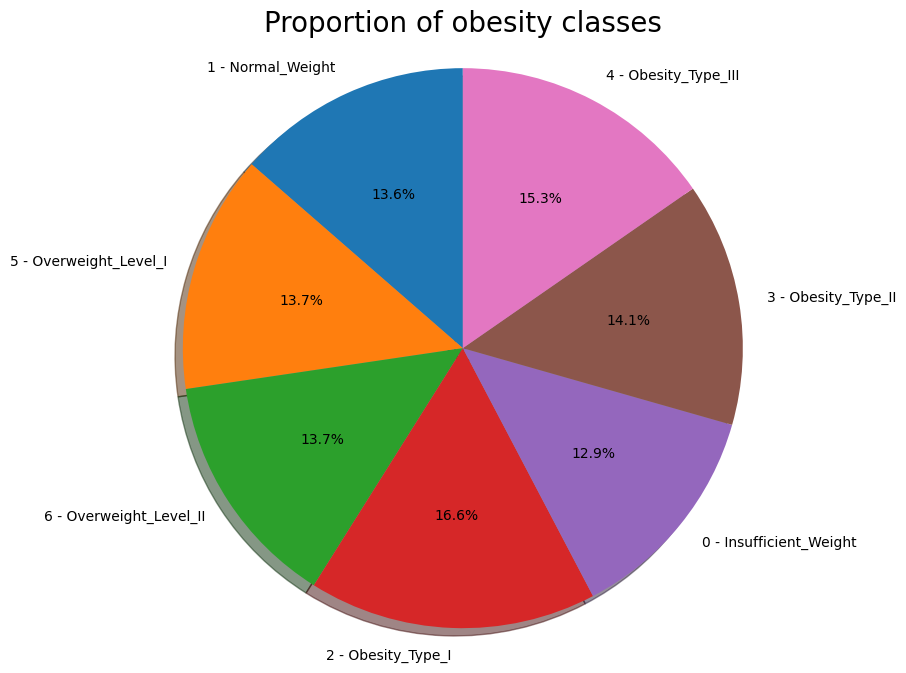

In [24]:
# Check propotion of obesity class
labels = '1 - Normal_Weight', '5 - Overweight_Level_I', '6 - Overweight_Level_II', '2 - Obesity_Type_I', '0 - Insufficient_Weight', '3 - Obesity_Type_II', '4 - Obesity_Type_III'
sizes = [obesity['class'][obesity['class']==1].count(), obesity['class'][obesity['class']==5].count(),
         obesity['class'][obesity['class']==6].count(), obesity['class'][obesity['class']==2].count(),
         obesity['class'][obesity['class']==0].count(), obesity['class'][obesity['class']==3].count(),
         obesity['class'][obesity['class']==4].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of obesity classes", size = 20)
plt.show()

Text(0.5, 1.0, 'Correlation matrix')

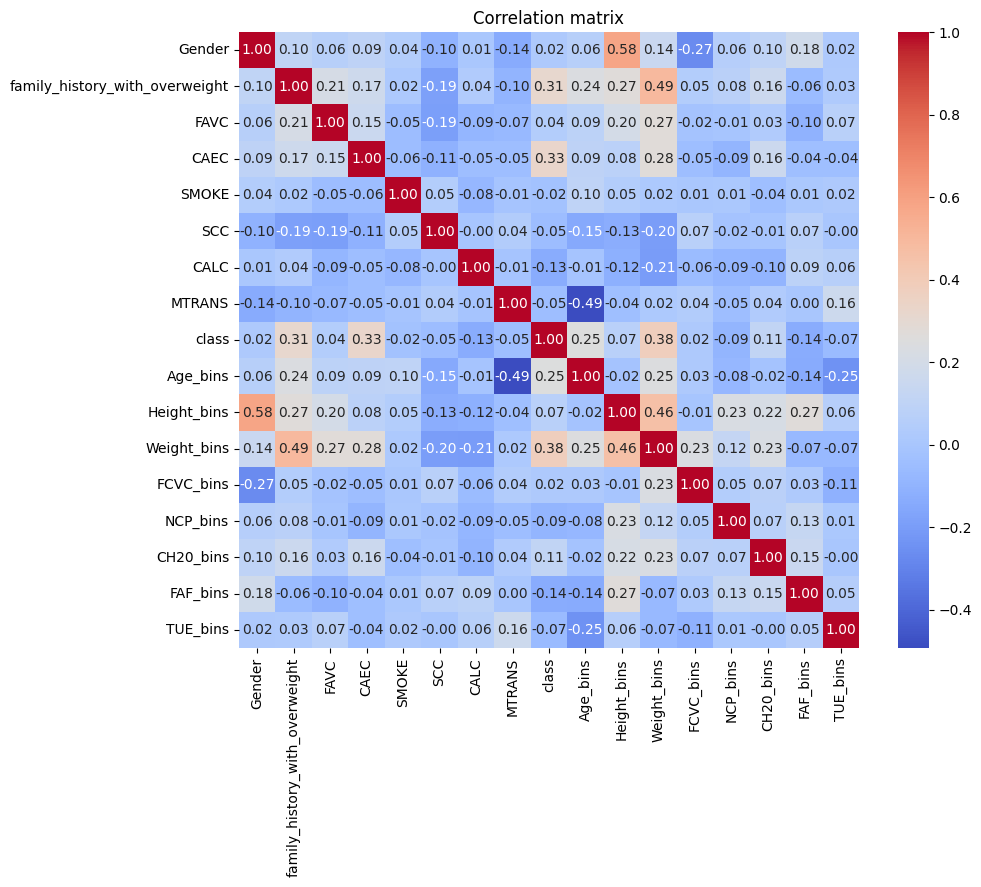

In [25]:
# Calculating the correlation matrix
correlation_matrix = obesity.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')

In [26]:
# Checking basic descriptive statistics
obesity.describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,class,Age_bins,Height_bins,Weight_bins,FCVC_bins,NCP_bins,CH20_bins,FAF_bins,TUE_bins
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,0.817622,0.883941,1.859308,0.020843,0.045476,2.268593,2.365230,3.015632,0.923733,2.503079,5.121270,4.885836,4.123638,3.446708,2.289910,2.170062
std,0.500083,0.386247,0.320371,0.468543,0.142893,0.208395,0.515498,1.261423,1.952090,0.740411,0.967170,2.685308,2.056257,1.981279,2.304925,2.132637,2.198443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,3.000000,1.000000,0.000000,2.000000,3.000000,3.000000,4.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,3.000000,3.000000,1.000000,3.000000,5.000000,5.000000,5.000000,3.000000,2.000000,2.000000
75%,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.000000,5.000000,1.000000,3.000000,7.000000,7.000000,5.000000,5.000000,4.000000,3.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000,4.000000,6.000000,5.000000,5.000000,14.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Data Preprocessing

In [11]:
y = obesity.pop('class')
x = obesity

x.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,CALC,MTRANS,Age_bins,Height_bins,Weight_bins,FCVC_bins,NCP_bins,CH20_bins,FAF_bins,TUE_bins
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,...,3,3,1,2,3,3,5,3,0,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,...,2,3,1,1,2,7,5,7,7,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,...,1,3,1,3,4,3,5,3,5,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,...,1,4,1,3,5,7,5,3,5,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,...,2,3,1,3,5,3,0,3,0,0


In [27]:
y.head()

0    1
1    1
2    1
3    5
4    6
Name: class, dtype: int8

Import - Standard Scaler

In [28]:
# Data scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_sc = sc.fit_transform(x)

print(x_sc)

[[-1.01191369 -0.52212439 -0.87558934 ... -0.19385166 -1.07400029
   0.3776014 ]
 [-1.01191369 -0.52212439 -1.94759928 ...  1.5419738   2.20909906
  -0.9873242 ]
 [ 0.98822657 -0.20688898  1.05402854 ... -0.19385166  1.27107067
   0.3776014 ]
 ...
 [-1.01191369 -0.28190933  0.54167211 ...  0.24010471  0.33304229
  -0.0773738 ]
 [-1.01191369  0.00777624  0.40492652 ...  1.5419738   0.33304229
  -0.0773738 ]
 [-1.01191369 -0.10211908  0.39834438 ...  1.5419738  -0.1359719
  -0.0773738 ]]


# Import - PCA - Scaler
There are few correlations, so I will try using the PCA method to reduce the number of components.

In [29]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_sc)

In [30]:
pca_new = PCA(n_components=12)
x_new = pca_new.fit_transform(x_sc)

print(x_new)

[[ 2.179078   -0.16562385  0.42123944 ...  2.40408826  0.46951937
  -1.66585556]
 [ 1.6336074  -1.27301702 -3.29063289 ...  3.85087417  0.62642338
   2.2310017 ]
 [-0.69476069 -1.9885661   1.07919512 ... -0.15570613  0.37512414
  -2.94311182]
 ...
 [-2.25815852  0.23273613 -2.01576559 ... -0.0595548   0.04748201
  -0.16191156]
 [-2.77213741  0.21951294 -2.41215474 ... -0.01722316 -0.18595049
  -0.05785997]
 [-2.69245848  0.2990469  -2.41555462 ...  0.01527754 -0.14326054
  -0.08030996]]


# Logistic Regression with PCA

In [64]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x_new,y,test_size=0.3, random_state = 42, stratify = y)

In [65]:
from sklearn.model_selection import GridSearchCV
# Define the logistic regression classifier
clf = LogisticRegression(max_iter=1000)

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid to the data
grid_search.fit(X_train_pca, y_train_pca)

# Display the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best estimator
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test_pca)

# Calculate accuracy score
accuracy = accuracy_score(y_test_pca, y_pred)
print("Accuracy: ", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters found:  {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Accuracy:  0.722397476340694


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [43]:
# Calculation of the confusion matrix for the test data and the predictions made by the logistic regression model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
print(confusion_matrix(y_test_pca, y_pred))

[[61 17  0  0  0  3  1]
 [25 35  2  0  0 17  7]
 [ 0  1 84  5  0  5 11]
 [ 0  0  3 84  0  0  2]
 [ 0  0  0  1 96  0  0]
 [ 3 11  7  0  0 51 15]
 [ 1  8 19  1  0 11 47]]


In [44]:
# Classification report
target_names = ['0','1','2','3','4','5','6']
print(classification_report(y_test_pca, y_pred.reshape(-1,1), target_names=target_names))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71        82
           1       0.49      0.41      0.44        86
           2       0.73      0.79      0.76       106
           3       0.92      0.94      0.93        89
           4       1.00      0.99      0.99        97
           5       0.59      0.59      0.59        87
           6       0.57      0.54      0.55        87

    accuracy                           0.72       634
   macro avg       0.71      0.71      0.71       634
weighted avg       0.72      0.72      0.72       634



In [45]:
print("Accuracy: ",accuracy_score(y_test_pca,y_pred))

Accuracy:  0.722397476340694


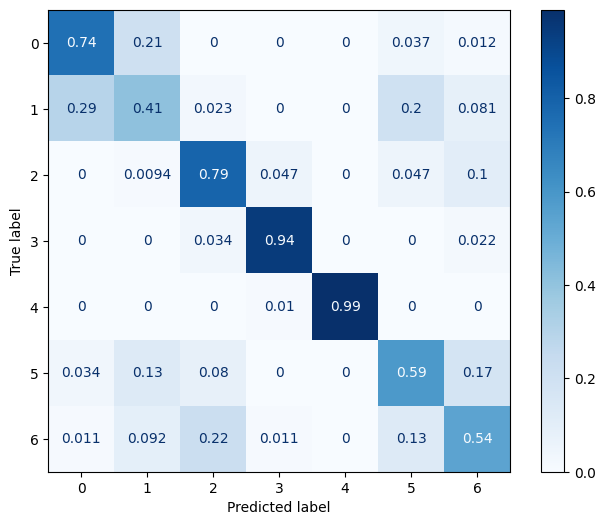

In [46]:
# Confusion matrix
lr_cm_pca = confusion_matrix(y_test_pca, y_pred.reshape(-1,1), normalize='true')
lr_disp_pca = ConfusionMatrixDisplay(confusion_matrix=lr_cm_pca, display_labels=target_names)
lr_fig_pca, lr_ax_pca = plt.subplots(figsize=(8,6))
lr_disp_pca.plot(ax=lr_ax_pca,cmap='Blues')

# Logistic Regression - without PCA
Let's try the same method without PCA.

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x_sc, y,test_size=0.3, random_state = 42, stratify = y)

In [67]:
from sklearn.model_selection import GridSearchCV
# Define the logistic regression classifier
clf = LogisticRegression(max_iter=1000)

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid to the data
grid_search.fit(X_train, y_train)

# Display the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best estimator
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters found:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Accuracy:  0.9305993690851735


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [68]:
# Classification report
target_names = ['0','1','2','3','4','5','6']
print(classification_report(y_test, y_pred.reshape(-1,1), target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96        82
           1       0.90      0.92      0.91        86
           2       0.99      0.91      0.95       106
           3       0.98      1.00      0.99        89
           4       1.00      0.99      0.99        97
           5       0.84      0.87      0.86        87
           6       0.84      0.87      0.85        87

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



Accuracy improves without PCA, but we have two classes with a class proportion under 14% that exhibit slightly worse F1-scores compared to other classes. I will use the SMOTE method to upsample the minority classes and see if this gives me better results.

In [69]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

from sklearn.model_selection import GridSearchCV
# Define the logistic regression classifier
clf = LogisticRegression(max_iter=1000)

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid to the data
grid_search.fit(X_resampled, y_resampled)

# Display the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best estimator
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters found:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Accuracy:  0.9321766561514195


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [70]:
# Classification report
target_names = ['0','1','2','3','4','5','6']
print(classification_report(y_test, y_pred.reshape(-1,1), target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96        82
           1       0.91      0.92      0.91        86
           2       0.99      0.91      0.95       106
           3       0.98      1.00      0.99        89
           4       1.00      0.99      0.99        97
           5       0.85      0.89      0.87        87
           6       0.84      0.87      0.85        87

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



I don't observe any significant improvements after applying the SMOTE method. Let's see if the Decision Tree model provides better results.

# Decision Tree

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sc,y,test_size=0.3,random_state=42)


In [72]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(dtree, param_grid, cv=5)

# Fit the grid to the data
grid_search.fit(X_train, y_train)

# Display the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best estimator
best_dtree = grid_search.best_estimator_
y_pred = best_dtree.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy:  0.9479495268138801


In [73]:
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))

[[84  2  0  0  0  0  0]
 [ 7 77  0  0  0  9  0]
 [ 0  0 99  3  0  0  0]
 [ 0  0  2 86  0  0  0]
 [ 0  0  1  0 97  0  0]
 [ 0  1  0  0  0 83  4]
 [ 0  0  0  0  0  4 75]]


In [74]:
# Classification report
print(classification_report(y_test, y_pred.reshape(-1,1), target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        86
           1       0.96      0.83      0.89        93
           2       0.97      0.97      0.97       102
           3       0.97      0.98      0.97        88
           4       1.00      0.99      0.99        98
           5       0.86      0.94      0.90        88
           6       0.95      0.95      0.95        79

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



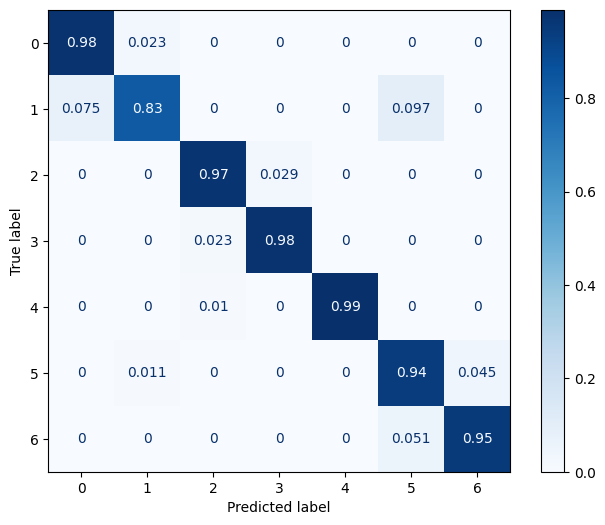

In [75]:
# Confusion matrix
dt_cm = confusion_matrix(y_test, y_pred.reshape(-1,1), normalize='true')
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=target_names)
dt_fig, dt_ax = plt.subplots(figsize=(8,6))
dt_disp.plot(ax=dt_ax,cmap='Blues')

The Decision Tree method yielded better results than Logistic Regression. However, let's also explore other methods.

# Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.3, random_state=42)

# Define the RandomForest classifier
clf = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid to the data
grid_search.fit(X_train, y_train)

# Display the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best estimator
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy:  0.944794952681388


In [77]:
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))

[[82  4  0  0  0  0  0]
 [ 3 84  0  0  0  6  0]
 [ 0  1 97  3  0  0  1]
 [ 0  0  1 87  0  0  0]
 [ 0  0  1  0 97  0  0]
 [ 0  9  0  0  0 76  3]
 [ 0  2  0  0  0  1 76]]


In [78]:
# Classification report
print(classification_report(y_test, y_pred.reshape(-1,1), target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96        86
           1       0.84      0.90      0.87        93
           2       0.98      0.95      0.97       102
           3       0.97      0.99      0.98        88
           4       1.00      0.99      0.99        98
           5       0.92      0.86      0.89        88
           6       0.95      0.96      0.96        79

    accuracy                           0.94       634
   macro avg       0.95      0.94      0.94       634
weighted avg       0.95      0.94      0.95       634



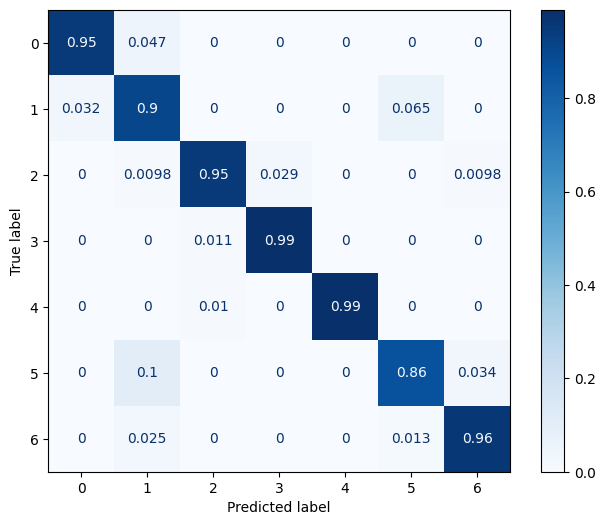

In [79]:
# Confusion matrix
dt_cm = confusion_matrix(y_test, y_pred.reshape(-1,1), normalize='true')
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=target_names)
dt_fig, dt_ax = plt.subplots(figsize=(8,6))
dt_disp.plot(ax=dt_ax,cmap='Blues')

# SVC (Support Vector Classifier)

In [80]:
from sklearn.svm import SVC

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.2, random_state=42)

# Define the SVC classifier
clf = SVC()

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid to the data
grid_search.fit(X_train, y_train)

# Display the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best estimator
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Best parameters found:  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy:  0.9716312056737588


In [81]:
# Classification report
print(classification_report(y_test, y_pred.reshape(-1,1), target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.97      0.95      0.96        62
           2       0.99      1.00      0.99        78
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00        63
           5       0.96      0.91      0.94        56
           6       0.91      0.96      0.93        50

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



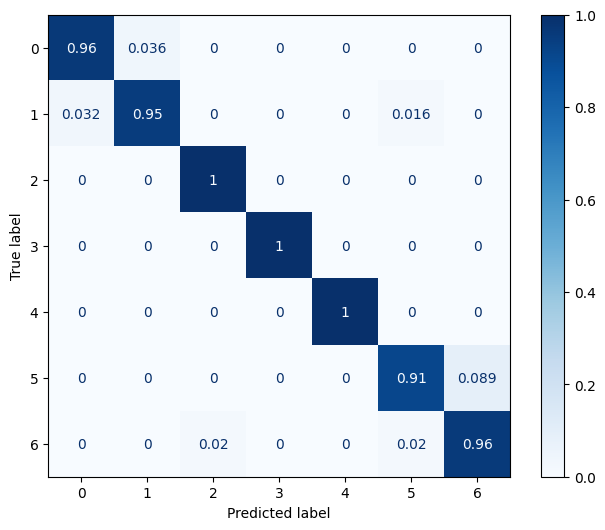

In [82]:
# Confusion matrix
dt_cm = confusion_matrix(y_test, y_pred.reshape(-1,1), normalize='true')
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=target_names)
dt_fig, dt_ax = plt.subplots(figsize=(8,6))
dt_disp.plot(ax=dt_ax,cmap='Blues')

# XGB Classifier

In [83]:
from xgboost import XGBClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.2, random_state=42)

# Define the XGBClassifier
clf = XGBClassifier()

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid to the data
grid_search.fit(X_train, y_train)

# Display the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best estimator
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Accuracy:  0.9574468085106383


In [84]:
# Classification report
print(classification_report(y_test, y_pred.reshape(-1,1), target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        56
           1       0.95      0.85      0.90        62
           2       0.97      0.97      0.97        78
           3       0.98      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.90      0.93      0.91        56
           6       0.98      0.98      0.98        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



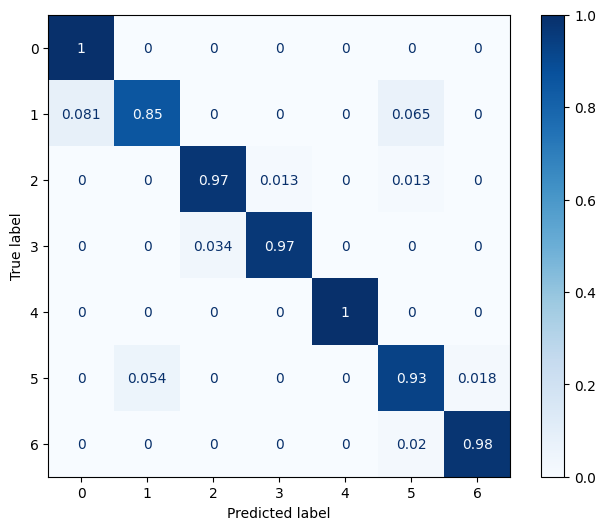

In [85]:
# Confusion matrix
dt_cm = confusion_matrix(y_test, y_pred.reshape(-1,1), normalize='true')
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=target_names)
dt_fig, dt_ax = plt.subplots(figsize=(8,6))
dt_disp.plot(ax=dt_ax,cmap='Blues')

# KNeighbors Classifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.2, random_state=42)

# Define the KNeighborsClassifier
knn = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid to the data
grid_search.fit(X_train, y_train)

# Display the best parameters found
print("Best parameters for KNeighborsClassifier: ", grid_search.best_params_)

# Use the best parameters to define the KNeighborsClassifier
best_params = grid_search.best_params_
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                weights=best_params['weights'],
                                algorithm=best_params['algorithm'],
                                p=best_params['p'])

# Fit the best KNeighborsClassifier on the training data
best_knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_knn.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best KNeighborsClassifier parameters: ", accuracy)

Best parameters for KNeighborsClassifier:  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy with best KNeighborsClassifier parameters:  0.8794326241134752


In [87]:
# Classification report
print(classification_report(y_test, y_pred.reshape(-1,1), target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        56
           1       0.82      0.58      0.68        62
           2       0.88      0.95      0.91        78
           3       0.95      0.98      0.97        58
           4       0.98      1.00      0.99        63
           5       0.74      0.80      0.77        56
           6       0.86      0.86      0.86        50

    accuracy                           0.88       423
   macro avg       0.88      0.88      0.87       423
weighted avg       0.88      0.88      0.88       423



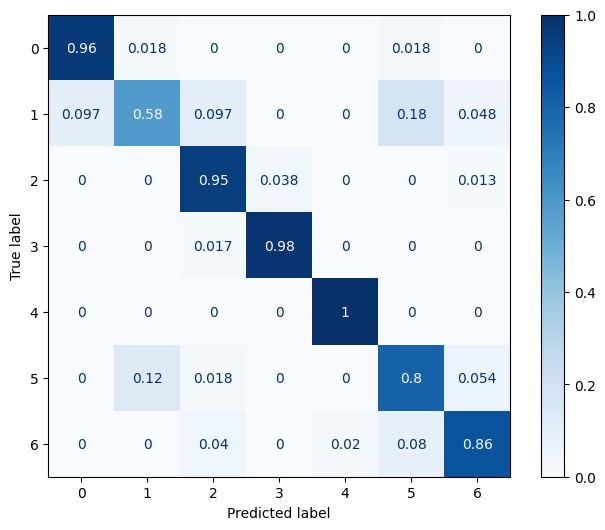

In [88]:
# Confusion matrix
dt_cm = confusion_matrix(y_test, y_pred.reshape(-1,1), normalize='true')
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=target_names)
dt_fig, dt_ax = plt.subplots(figsize=(8,6))
dt_disp.plot(ax=dt_ax,cmap='Blues')


Model accuracy comparison:

- LR with PCA - 0.72
- LR without PCA - 0.93
- LR without PCA with SMOTE - 0.93
- Decision Tree Classifier - 0.95
- Random Forest Classifier - 0.94
- SVC Classifier - 0.97
- XGB Classifier - 0.96
- KNeighbors Classifier - 0.88

